In [163]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
from IPython.display import display
import ipywidgets as widgets
from folium import plugins
import branca.colormap as cm

In [2]:
# al archivo del ssn se le borró manualmente leyendas al principio y al final que no son valores separados por comas.
# argumento 'dtype={'Magnitud': str}' porque en esa columna hay valores de diferentes tipos.
df = pd.read_csv('SSNMX_catalogo_19000101_20240719.csv',dtype={'Magnitud': str})

In [3]:
# extraer mes y año en nuevas columnas
df['Mes'] = pd.DatetimeIndex(df['Fecha']).month
df['Anio'] = pd.DatetimeIndex(df['Fecha']).year
df['Hora24'] = pd.DatetimeIndex(df['Hora']).hour

In [4]:
# nueva columna 'Estado_extract' extrayendo últimas 4 letras de columna 'Referencia de localización'
df['Estado_extract'] = df['Referencia de localizacion'].str.slice(-4,) 

In [5]:
# resultados de extraer 4 últimas letras
df.Estado_extract.unique()

array([' JAL', ' BCS', ' SIN', ' GRO', 'CHIS', 'MICH', ' OAX', ' MEX',
       ', BC', ' VER', ' SON', ' PUE', 'CHIH', ' COL', ' NAY', ' TAB',
       'CAMP', 'CDMX', ', QR', 'TAMS', ' HGO', ' SLP', ' QRO', ' YUC',
       ' MOR', 'COAH', 'TLAX', ' GTO', ', NL', ' ZAC', ' DGO', ' AGS',
       'A, N', 'BCS ', ' BC ', 'OAX ', 'VER ', 'GRO ', 'HIS ', 'ICH ',
       'JAL ', 'HGO ', 'COL ', 'MOR ', 'PUE ', 'SLP ', 'ZAC ', 'TAB ',
       'SON ', 'SIN ', 'OAH ', 'LAX ', 'HIH ', 'MEX ', 'DGO ', 'NAY ',
       ' NL ', 'AMS ', 'DMX '], dtype=object)

In [6]:
# diccionario para uniformar abreviaciones de estados
estados = {' JAL':'JAL', ' BCS':'BCS', ' SIN':'SIN', ' GRO':'GRO', 'CHIS':'CHIS', 'MICH':'MICH', ' OAX':'OAX', ' MEX':'MEX',
       ', BC':'BC', ' VER':'VER', ' SON':'SON', ' PUE':'PUE', 'CHIH':'CHIH', ' COL':'COL', ' NAY':'NAY', ' TAB':'TAB',
       'CAMP':'CAMP', 'CDMX':'CDMX', ', QR':'QR', 'TAMS':'TAMS', ' HGO':'HGO', ' SLP':'SLP', ' QRO':'QRO', ' YUC':'YUC',
       ' MOR':'MOR', 'COAH':'COAH', 'TLAX':'TLAX', ' GTO':'GTO', ', NL':'NL', ' ZAC':'ZAC', ' DGO':'DGO', ' AGS':'AGS',
       'A, N':'NL', 'BCS ':'BCS', ' BC ':'BC', 'OAX ':'OAX', 'VER ':'VER', 'GRO ':'GRO', 'HIS ':'CHIS', 'ICH ':'MICH',
       'JAL ':'JAL', 'HGO ':'HGO', 'COL ':'COL', 'MOR ':'MOR', 'PUE ':'PUE', 'SLP ':'SLP', 'ZAC ':'ZAC', 'TAB ':'TAB',
       'SON ':'SON', 'SIN ':'SIN', 'OAH ':'COAH', 'LAX ':'TLAX', 'HIH ':'CHIH', 'MEX ':'MEX', 'DGO ':'DGO', 'NAY ':'NAY',
       ' NL ':'NL', 'AMS ':'TAMS', 'DMX ':'CDMX'}

In [7]:
# aplicación de abreviaciones uniformes en nueva columna "Estados"
df['Estados'] = df['Estado_extract'].map(estados)

In [8]:
df

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,Mes,Anio,Hora24,Estado_extract,Estados
0,1900-01-20,00:33:30,7.4,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-01-20,06:33:30,revisado,1,1900,0,JAL,JAL
1,1900-05-16,14:12:00,6.9,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-05-16,20:12:00,revisado,5,1900,14,JAL,JAL
2,1901-03-05,04:45:00,6.9,25.00,-110.00,33.0,"100 km al NORESTE de LA PAZ, BCS",1901-03-05,10:45:00,revisado,3,1901,4,BCS,BCS
3,1901-12-08,20:17:00,7.0,26.00,-110.00,33.0,"83 km al OESTE de AHOME, SIN",1901-12-09,02:17:00,revisado,12,1901,20,SIN,SIN
4,1902-01-16,17:19:00,7.0,17.62,-99.72,33.0,"21 km al OESTE de ZUMPANGO DEL RIO, GRO",1902-01-16,23:19:00,revisado,1,1902,17,GRO,GRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310708,2024-07-19,04:59:30,3.0,31.35,-115.45,6.5,"68 km al NOROESTE de SAN FELIPE, BC",2024-07-19,10:59:30,verificado,7,2024,4,BC,BC
310709,2024-07-19,05:47:30,4.2,17.88,-96.98,73.4,"40 km al ESTE de TEPELMEME, OAX",2024-07-19,11:47:30,verificado,7,2024,5,OAX,OAX
310710,2024-07-19,05:57:31,4.0,14.18,-94.13,16.0,"193 km al SUROESTE de MAPASTEPEC, CHIS",2024-07-19,11:57:31,verificado,7,2024,5,HIS,CHIS
310711,2024-07-19,06:44:49,2.2,19.48,-99.30,1.0,"7 km al OESTE de NAUCALPAN DE JUAREZ, MEX",2024-07-19,12:44:49,verificado,7,2024,6,MEX,MEX


In [9]:
# nuevo df excluyendo filas sin magnitud calculada
df_mags = df[df['Magnitud'] != 'no calculable'] 

In [10]:
# convertir columna 'Magnitud' a tipo float
df_mags[['Magnitud']] = df_mags[['Magnitud']].astype(float)

/tmp/ipykernel_82224/1449003844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mags[['Magnitud']] = df_mags[['Magnitud']].astype(float)


In [13]:
# nuevo df incluyendo mangintudes iguales o mayores a 5.0
df_mags_5 = df_mags[df_mags['Magnitud'] >= 5 ]

In [53]:
# explorando inicio de años con registros significativos
df_mags_5.Anio.value_counts().sort_index()[58:65]

1974    28
1975    31
1976    34
1977    13
1978    27
1979    45
1980    27
Name: Anio, dtype: int64

<AxesSubplot:xlabel='Anio', ylabel='Count'>

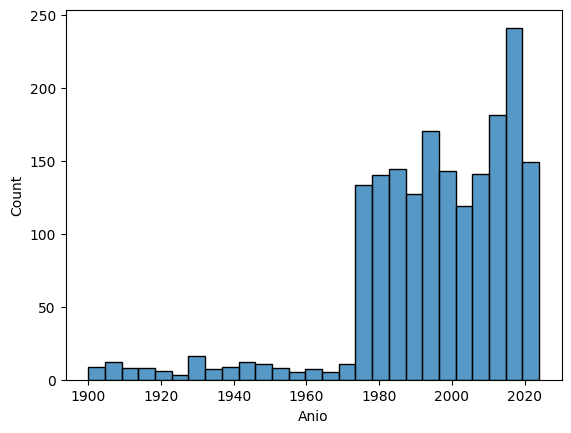

In [38]:
# explorando inicio de años con registros significativos
sns.histplot(data=df_mags_5,x=df_mags_5.Anio,cumulative=False)

In [68]:
df_mag5_74 = df_mags_5[df_mags_5['Anio'] >= 1974 ]

<AxesSubplot:xlabel='Mes', ylabel='count'>

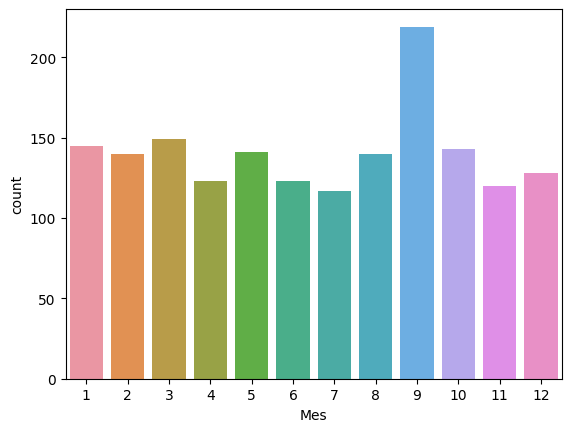

In [70]:
# visualización por mes
plot_mes = sns.countplot(data=df_mag5_74,x='Mes')
plot_mes

<AxesSubplot:xlabel='Anio', ylabel='count'>

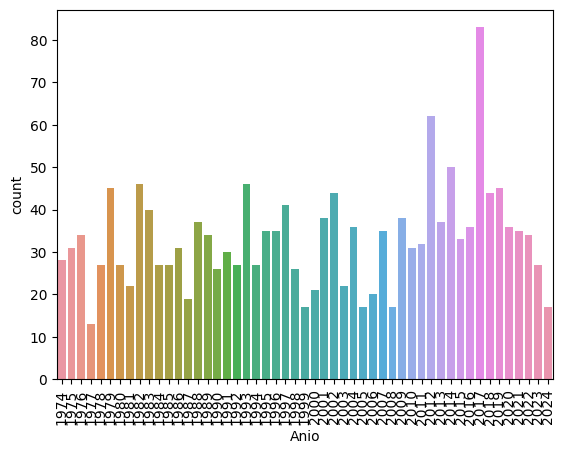

In [83]:
# visualización por año
plot_anio = sns.countplot(data=df_mag5_74,x='Anio')
plt.setp(plot_anio.get_xticklabels(), rotation=90)
plot_anio

<AxesSubplot:xlabel='Hora24', ylabel='count'>

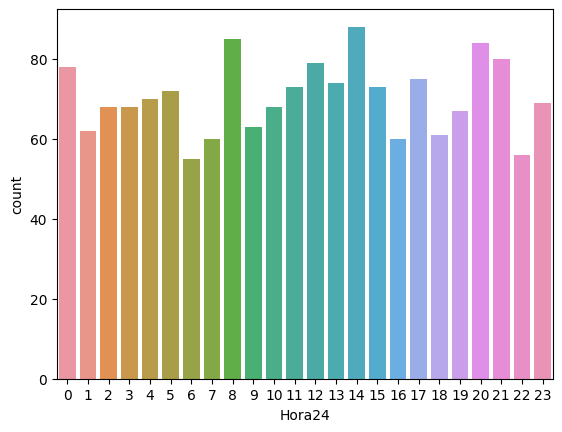

In [76]:
# visualización por hora
plot_hora = sns.countplot(data=df_mag5_74,x='Hora24')
plot_hora

<AxesSubplot:xlabel='Estados', ylabel='count'>

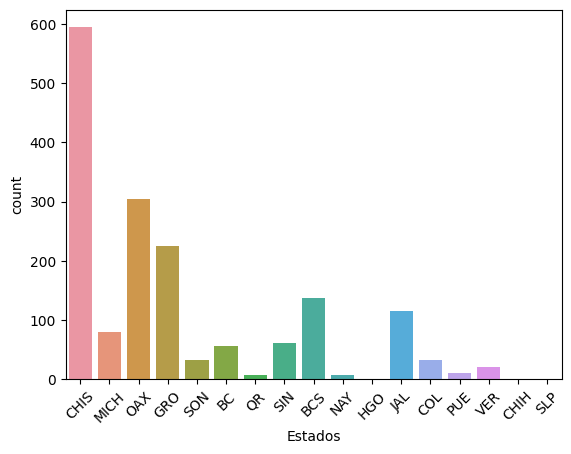

In [81]:
# visualización por estado
plot_estados = sns.countplot(data=df_mag5_74,x='Estados')
plt.setp(plot_estados.get_xticklabels(), rotation=45)
plot_estados

In [123]:
m = folium.Map(location=[23.0, -99.147166], zoom_start=4.5)

loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>Public Wifi access points in Mexico City</b></h3>
             '''.format(loc)
# add title
m.get_root().html.add_child(folium.Element(title_html))

for index, row in df_mag5_74.iterrows():
    latitude = row['Latitud']
    longitude = row['Longitud']
    nombre = row['Magnitud']
    programa = row['Estados']
    #colonia = row['colonia']
    
    
    # Add a marker with a popup for each point, color could be customized
    folium.CircleMarker(
                        location=[latitude, longitude],
                        icon=folium.Icon(), 
                        radius=float(nombre)**1,
                        #color=color,
                        fill=True,
                        fill_opacity=0.6,
                        tooltip=[nombre,programa],
                        keep_in_front=True
                        ).add_to(m)


m

In [193]:
# Defining the range of values for the colormap
min_value = min(df_mag5_74.Magnitud)
max_value = max(df_mag5_74.Magnitud)

# Creating the colormap
colormap = cm.LinearColormap(['green','yellow', 'red'],
                             #index=[2024, 2007, 1990, 1974], 
                             vmin=min_value, vmax=max_value,
                            caption='Magnitud registrada')

In [194]:
colormap

In [197]:
# creating the map

m = folium.Map(location=[23.0, -99.147166], zoom_start=4.5)

loc = 'Corpus Christi'
#defining the title
title_html = '''
             <h3 align="center" style="font-size:16px"><b>Earthquakes >= 5.0° Richter since 1974 in Mexico, color coded by magnitude</b></h3>
             '''.format(loc)
#adding the title
m.get_root().html.add_child(folium.Element(title_html))

for index, row in df_mag5_74[:].iterrows():
    latitude = row['Latitud']
    longitude = row['Longitud']
    name = row['Estados']
    #color = category_colors.get(category, '#000000')
    year = row['Magnitud']
    site = row['Anio']
    color = colormap(year)
    
    # Add a marker with a popup for each point
    folium.CircleMarker(
                        location=[latitude, longitude],
                        icon=folium.Icon(color=color),  # Pass the color variable
                        radius=1,
                        color=color,
                        fill=True,
                        fill_opacity=0.6,
                        tooltip=[name,year,site],
                        keep_in_front=True
                        ).add_to(m)
m.add_child(colormap)

m

/tmp/ipykernel_82224/1968732787.py:25: UserWarning: color argument of Icon should be one of: {'darkblue', 'blue', 'pink', 'darkpurple', 'darkgreen', 'purple', 'white', 'lightgreen', 'lightred', 'darkred', 'red', 'gray', 'lightgray', 'beige', 'green', 'cadetblue', 'lightblue', 'orange', 'black'}.
  icon=folium.Icon(color=color),  # Pass the color variable
